# 1st Stage
At first stage we import necessary libraries.

In [1]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation

# 2nd Stage
At this stage we import our dataset .
Then we need to clean it and pop all unnecessary data.
In this data set we just use data for one station. We choose "AMIRABAD POST" station with code "33501". Also since we need to find a relation between Maximum and Minimum temperature of region We delete unnecessary columns.

In [2]:
# import and Cleaning data
df = pd.read_csv(r'C:\Users\meysam\Desktop\My Python Stuff\Advanced Algorithm SBU\M.L\Linear Regression\WWII weather dataset\Summary of Weather.csv')
df.drop(df.columns.difference(['STA','MaxTemp','MinTemp']), 1, inplace=True)
df = df.query("STA == 33501")
df.pop(df.columns[0])
df

C:\Users\meysam\AppData\Local\Temp\ipykernel_29868\379124401.py:2: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\meysam\Desktop\My Python Stuff\Advanced Algorithm SBU\M.L\Linear Regression\WWII weather dataset\Summary of Weather.csv')
C:\Users\meysam\AppData\Local\Temp\ipykernel_29868\379124401.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['STA','MaxTemp','MinTemp']), 1, inplace=True)


,MaxTemp,MinTemp
88953,18.333333,7.222222
88954,16.666667,7.777778
88955,16.666667,7.222222
88956,16.666667,6.111111
88957,19.444444,6.111111
...,...,...
89722,8.888889,-2.222222
89723,6.666667,-3.333333
89724,4.444444,-3.888889
89725,5.555556,-5.000000


# 3rd Stage 
Here we normalize data.

In [3]:
# Grab the relevant data, scale the predictor variable, and add a column of 1s for the gradient descent...
x = df['MinTemp']
y = df['MaxTemp']
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

# 4th Stage
At this stage we implement Gradient Descent for our data.

In [4]:
# Gradient Descent
Alpha = 0.01 # step size
iterations = 1000 # number of iterations 
m = y.size
np.random.seed(123) # Setting the seed
Theta = np.random.rand(2) #picking random value to start

def Gradient_Descent(x , y , Theta , iterations , Alpha) :
    Past_MaxTemps = []
    Past_Thetas = [Theta]
    for i in range(iterations):
        Prediction = np.dot(x , Theta)
        Error = Prediction - y
        MaxTemp = 1/(2*m) * np.dot(Error.T, Error)
        Past_MaxTemps.append(MaxTemp)
        Theta = Theta - (Alpha * (1/m) * np.dot(x.T, Error))
        Past_Thetas.append(Theta)
        
    return Past_Thetas, Past_MaxTemps

#Passing relevant variables to the function and geting new values
Past_Thetas, Past_MaxTemps = Gradient_Descent(x , y , Theta , iterations , Alpha)
Theta = Past_Thetas[-1]

#printing Gradient Descent
print("Gradient Descent: {:.2f}, {:.2f}".format(Theta[0], Theta[1]))


Gradient Descent: 22.44, 10.94


# 5th Stage
Here we plot MaxTemp Function by running code below.

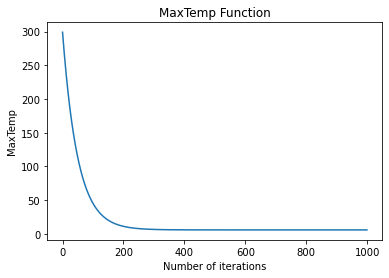

In [5]:
#Ploting MaxTemp function
plt.title('MaxTemp Function')
plt.xlabel('Number of iterations')
plt.ylabel('MaxTemp')
plt.plot(Past_MaxTemps)
plt.show()

# Final Stage
Now we visualize data.

In [6]:
#figures and plots
Fig = plt.figure()
Ax = plt.axes()
plt.title('Maximum Temperature according to Minimum Temperature')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.scatter(x[:,1], y, color='yellow')
line, = Ax.plot([], [], lw=2)
annotation = Ax.text(-1, 70000, '')
annotation.set_animated(True)
plt.close()

# Generating animation data
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = Past_Thetas[i][1]*x + Past_Thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (Past_MaxTemps[i]/10000000000))
    return line, annotation
animated = animation.FuncAnimation(Fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)
animated.save('animation.gif', writer='imagemagick', fps = 30)


MovieWriter imagemagick unavailable; using Pillow instead.



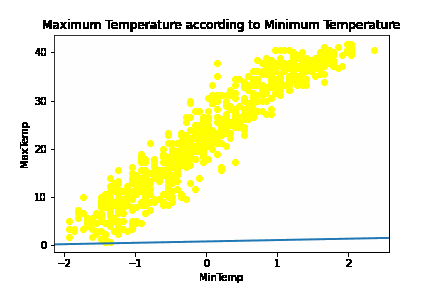

In [7]:
#Displaying animation
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))